In [1]:
import numpy as np
import spectral_embedding as se
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import scipy.stats as stats

In this example we demonstrate adjacency, Laplacian and unfolded spectral embedding techniques for sparse graphs. This allows for quicker calculation for larger graphs that does not have many edges.

In [2]:
np.random.seed(42)

#### Adjacency spectral embedding

We generate a sparse two community stochastic block model so that each community has exactly $n_k$ nodes, as it is is easier to generate sparse matrices with the correct edge probabilities between communities. The network generation tools in this package currently only generate dense versions of the different stochastic block models.

In [3]:
K = 2
nk = 2000
n = nk * K

B = se.generate_B(K)
print(np.round(B,3))

[[0.375 0.732]
 [0.732 0.599]]


Assign $n_k$ nodes to each of the $K$ communities and use that for colouring.

In [4]:
Z = np.repeat([0, 1], nk)
Z_col = np.repeat(['red', 'blue'], nk)

We generate sparse matrices for each block of the adjacency corresponding to a specific pair of communities and its associated edge probability from $\mathbf{B}$. We include a sparsity factor of $\rho = 0.05$ to make sure that the adjacency matrix is actually sparse, rather than a sparse representation of a dense matrix.

In [5]:
rho = 0.05

rvs = stats.bernoulli(B[0,0]).rvs
A00 = sparse.random(nk, nk, density=rho, data_rvs=rvs)

rvs = stats.bernoulli(B[0,1]).rvs
A01 = sparse.random(nk, nk, density=rho, data_rvs=rvs)

rvs = stats.bernoulli(B[1,1]).rvs
A11 = sparse.random(nk, nk, density=rho, data_rvs=rvs)

A = sparse.bmat([[A00, None], [A01, A11]])
A = sparse.tril(A,-1) + sparse.tril(A,-1).T

In [6]:
XA = se.ASE(A, K)

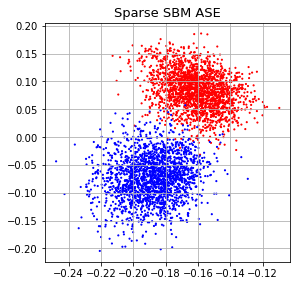

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4.4,4.4))

ax.grid()
ax.scatter(XA[:,0], XA[:,1], marker='.', s=5, c=Z_col)
ax.set_title('Sparse SBM ASE', fontsize=13);

#### Laplacian spectral embedding

Compute the Laplacian spectral embedding of the adjacency matrix constructed in the previous section.

In [8]:
XL = se.LSE(A, K)

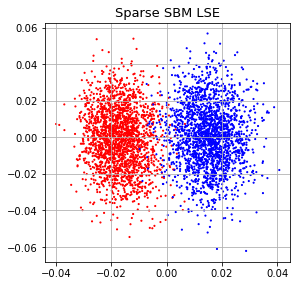

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4.4,4.4))

ax.grid()
ax.scatter(XL[:,0], XL[:,1], marker='.', s=5, c=Z_col)
ax.set_title('Sparse SBM LSE', fontsize=13);

#### Dynamic spectral embedding

We use the same technique to construct $T$ sparse two community stochastic block models where the edge probability matrix $\mathbf{B}^{(t)}$ is changing over time.

In [10]:
T = 3
Bs = np.zeros((T,K,K))
for t in range(T):
    Bs[t] = se.generate_B(K)

In [11]:
for t in range(T):
    rvs = stats.bernoulli(Bs[t,0,0]).rvs
    A00 = sparse.random(nk, nk, density=rho, data_rvs=rvs)

    rvs = stats.bernoulli(Bs[t,0,1]).rvs
    A01 = sparse.random(nk, nk, density=rho, data_rvs=rvs)

    rvs = stats.bernoulli(Bs[t,1,1]).rvs
    A11 = sparse.random(nk, nk, density=rho, data_rvs=rvs)

    A = sparse.bmat([[A00, None], [A01, A11]])
    A = sparse.tril(A,-1) + sparse.tril(A,-1).T
    
    if t == 0:
        As = [A]
    else:
        As.append(A)

In [12]:
_, YAs = se.UASE(As, K)

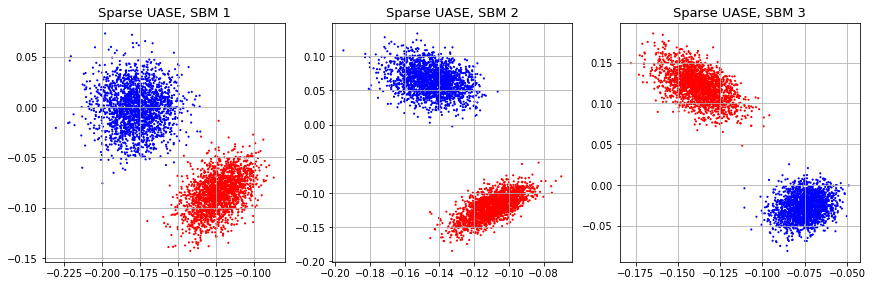

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(14.6,4.4))

for t in range(T):
    axs[t].grid()
    axs[t].scatter(YAs[t,:,0], YAs[t,:,1], marker='.', s=5, c=Z_col)        
    axs[t].set_title('Sparse UASE, SBM ' + str(t+1), fontsize=13);